In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

Let's download the dataset


In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-08-29 08:24:13--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2022-08-29 08:24:14 (85.8 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Loading Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Converting to date time object


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.9

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.07.19 |       h06a4308_0         131 KB  anaconda
    certifi-2022.6.15          |   py39h06a4308_0         156 KB  anaconda
    openssl-1.1.1q             |       h7f8727e_0         3.8 MB  anaconda
    seaborn-0.11.2             |     pyhd3eb1b0_0         223 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                 pkgs/main --> anaconda
  certifi                                         pkgs/main --> anaconda
  openssl                                         pkgs/main --> an

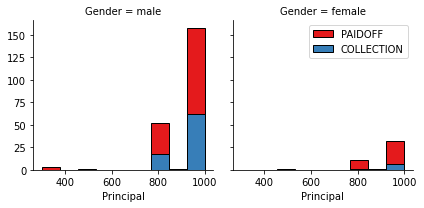

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

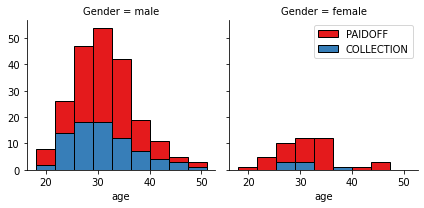

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


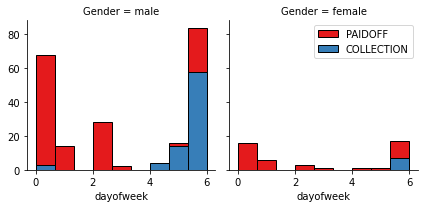

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Converting Categorical features to numerical values


Let's look at gender:


In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalising Data


Data Standardization give data zero mean and unit variance


In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)

# Classification


## K Nearest Neighbor(KNN)



In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2)
X_train.shape

(259, 8)

In [22]:
F1_scores=[]
Jaccard_indices=[]
Ks=[]
for k in range(1,50):
    Ks.append(k)
    neigh=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    F1_scores.append(f1_score(y_test,yhat,pos_label='PAIDOFF'))
    Jaccard_indices.append(jaccard_score(y_test,yhat,pos_label='PAIDOFF'))

In [24]:
df=pd.DataFrame()

In [25]:
df['Ks']=Ks
df['Jaccard indices']=Jaccard_indices
df['F1 scores']=F1_scores

In [26]:
df.set_index('Ks',inplace=True)

<AxesSubplot:xlabel='Ks'>

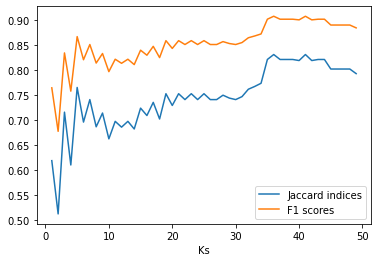

In [27]:
df.plot(kind='line')

In [28]:
df[df['Jaccard indices']==df['Jaccard indices'].max()]

,Jaccard indices,F1 scores
Ks,,
36,0.831325,0.907895
41,0.831325,0.907895


In [29]:
df[df['F1 scores']==df['F1 scores'].max()]

,Jaccard indices,F1 scores
Ks,,
36,0.831325,0.907895
41,0.831325,0.907895


In [30]:
k=36
neigh=KNeighborsClassifier(n_neighbors=k)
neigh.fit(X,y)

KNeighborsClassifier(n_neighbors=36)

# Decision Tree


In [31]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
X_train[0:5]

array([[ 0.51578458, -1.96168647,  0.01006414, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [-1.31458942, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [-1.31458942, -0.95911111,  1.83406953, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [-1.31458942, -0.95911111, -1.48230391, -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [-1.31458942, -0.95911111,  1.33661351, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108]])

In [33]:
drugTree=DecisionTreeClassifier(criterion='entropy',max_depth=2)
drugTree.fit(X_train,y_train)
predTree=drugTree.predict(X_test)

In [34]:
F1_score=f1_score(predTree,y_test,pos_label='PAIDOFF')
Jaccard_index=jaccard_score(predTree,y_test,pos_label='PAIDOFF')

In [35]:
print(F1_score,Jaccard_index)

0.90625 0.8285714285714286


In [36]:
drugTree=DecisionTreeClassifier(criterion='entropy',max_depth=2)
drugTree.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

# Support Vector Machine


In [37]:
import scipy.optimize as opt
from sklearn.svm import SVC

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)
X_train[0:5]

array([[ 0.51578458, -1.96168647,  0.01006414, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [-1.31458942, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [-1.31458942, -0.95911111,  1.83406953, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [-1.31458942, -0.95911111, -1.48230391, -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [-1.31458942, -0.95911111,  1.33661351, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108]])

In [39]:
clf=SVC(kernel='linear')
clf.fit(X_train,y_train)
yhat=clf.predict(X_test)

In [40]:
F1_SVM=f1_score(y_test,yhat,pos_label='PAIDOFF')
Js_SVM=jaccard_score(y_test,yhat,pos_label='PAIDOFF')

In [41]:
print(F1_SVM,Js_SVM)

0.90625 0.8285714285714286


In [42]:
clf=SVC(kernel='linear')
clf.fit(X,y)

SVC(kernel='linear')

# Logistic Regression


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)
X_train[0:5]

array([[ 0.51578458, -1.96168647,  0.01006414, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [-1.31458942, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [-1.31458942, -0.95911111,  1.83406953, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [-1.31458942, -0.95911111, -1.48230391, -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [-1.31458942, -0.95911111,  1.33661351, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108]])

In [45]:
LR=LogisticRegression(C=0.01,solver='liblinear')
LR.fit(X_train,y_train)
yhat=LR.predict(X_test)
yhat_prob=LR.predict_proba(X_test)

In [46]:
F1_LR=f1_score(y_test,yhat,pos_label='PAIDOFF')
Js_LR=jaccard_score(y_test,yhat,pos_label='PAIDOFF')
LL=log_loss(y_test,yhat_prob)

In [47]:
print(F1_LR,Js_LR,LL)

0.894308943089431 0.8088235294117647 0.5596633457155463


In [48]:
LR=LogisticRegression(C=0.01,solver='liblinear')
LR.fit(X,y)

LogisticRegression(C=0.01, solver='liblinear')

# Model Evaluation using Test set


First, download and load the test set:


In [49]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-08-29 08:29:49--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-08-29 08:29:49 (41.0 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Loading Test set for evaluation


In [50]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


## Preprocessing just like training set

In [51]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.groupby(['education'])['loan_status'].value_counts(normalize=True)
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
test_X = test_Feature
test_y = test_df['loan_status'].values
test_X= preprocessing.StandardScaler().fit(test_X).transform(test_X)

## Evaluation using jaccard index, f1 score and log loss

In [53]:
Jaccard=[]
F1_score=[]
LogLoss=[]
Algorithm=[]
yhat_KNN=neigh.predict(test_X)
Jaccard.append(jaccard_score(test_y,yhat_KNN,pos_label='PAIDOFF'))
F1_score.append(f1_score(test_y,yhat_KNN,pos_label='PAIDOFF'))
LogLoss.append(np.nan)
Algorithm.append('KNN')

In [54]:
predTree=drugTree.predict(test_X)
Jaccard.append(jaccard_score(test_y,predTree,pos_label='PAIDOFF'))
F1_score.append(f1_score(test_y,predTree,pos_label='PAIDOFF'))
LogLoss.append(np.nan)
Algorithm.append('Decision Tree')

In [55]:
yhat_SVM=clf.predict(test_X)
Jaccard.append(jaccard_score(test_y,yhat_SVM,pos_label='PAIDOFF'))
F1_score.append(f1_score(test_y,yhat_SVM,pos_label='PAIDOFF'))
LogLoss.append(np.nan)
Algorithm.append('SVM')

In [56]:
yhat_LR=LR.predict(test_X)
yhat_prob=LR.predict_proba(test_X)
Jaccard.append(jaccard_score(test_y,yhat_LR,pos_label='PAIDOFF'))
F1_score.append(f1_score(test_y,yhat_LR,pos_label='PAIDOFF'))
LogLoss.append(log_loss(test_y,yhat_prob))
Algorithm.append('Logistic Regression')

In [57]:
best_classifier_df=pd.DataFrame()
best_classifier_df['Algorithm']=Algorithm
best_classifier_df['Jaccard']=Jaccard
best_classifier_df['F1-score']=F1_score
best_classifier_df['Log Loss']=LogLoss
best_classifier_df.set_index('Algorithm',inplace=True)
best_classifier_df

,Jaccard,F1-score,Log Loss
Algorithm,,,
KNN,0.784314,0.879121,NaN
Decision Tree,0.740741,0.851064,NaN
SVM,0.740741,0.851064,NaN
Logistic Regression,0.740741,0.851064,0.556608


## So K nearest neighbour is the best classifier for figuiring out if a customer will payback his loan or not